In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pylab as plt

In [ ]:
df = pd.read_csv('/content/customers.csv')

In [ ]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [ ]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
df.shape

(10695, 11)

In [ ]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [ ]:
df_cleaned = df.dropna(axis=0)

In [ ]:
df_cleaned.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [ ]:
df_cleaned.shape

(8819, 11)

In [ ]:
df_cleaned.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
df_cleaned['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df_cleaned['Ever_Married'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df_cleaned['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
      dtype=object)

In [ ]:
df_cleaned['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [ ]:
df_cleaned['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [ ]:
df_cleaned['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [ ]:
categories_list=[['Male', 'Female'],['No', 'Yes'],['No', 'Yes'],['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor','Homemaker','Entertainment','Marketing', 'Executive'],['Low', 'Average','High']]
enc = OrdinalEncoder(categories=categories_list)

In [ ]:
customer_1 = df_cleaned.copy()
customer_1[['Gender','Ever_Married','Graduated','Profession','Spending_Score']] = enc.fit_transform(customer_1[['Gender','Ever_Married','Graduated','Profession','Spending_Score']])

In [ ]:
customer_1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation         int64
dtype: object

In [ ]:
le = LabelEncoder()

In [ ]:
customer_1['Segmentation'] = le.fit_transform(customer_1['Segmentation'])

In [ ]:
customer_1 = customer_1.drop('ID',axis=1)
customer_1 = customer_1.drop('Var_1',axis=1)

In [ ]:
customer_1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation        object
dtype: object

<ipython-input-40-10089f6ea683>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = customer_1.corr()


<Axes: >

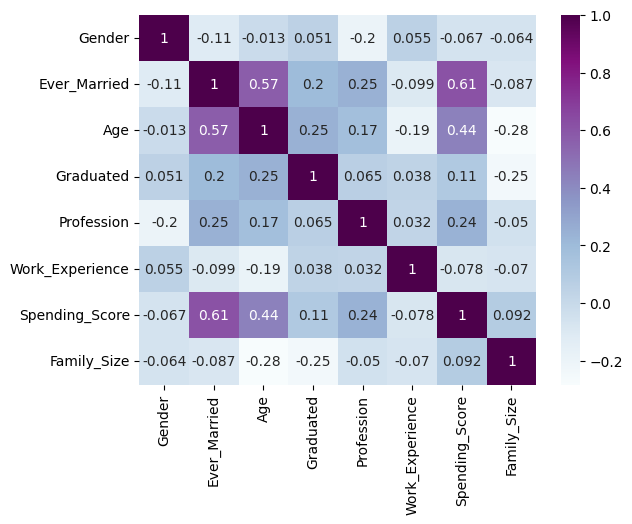

In [ ]:
# Calculate the correlation matrix
corr = customer_1.corr()

# Plot the heatmap
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="BuPu",
        annot= True)

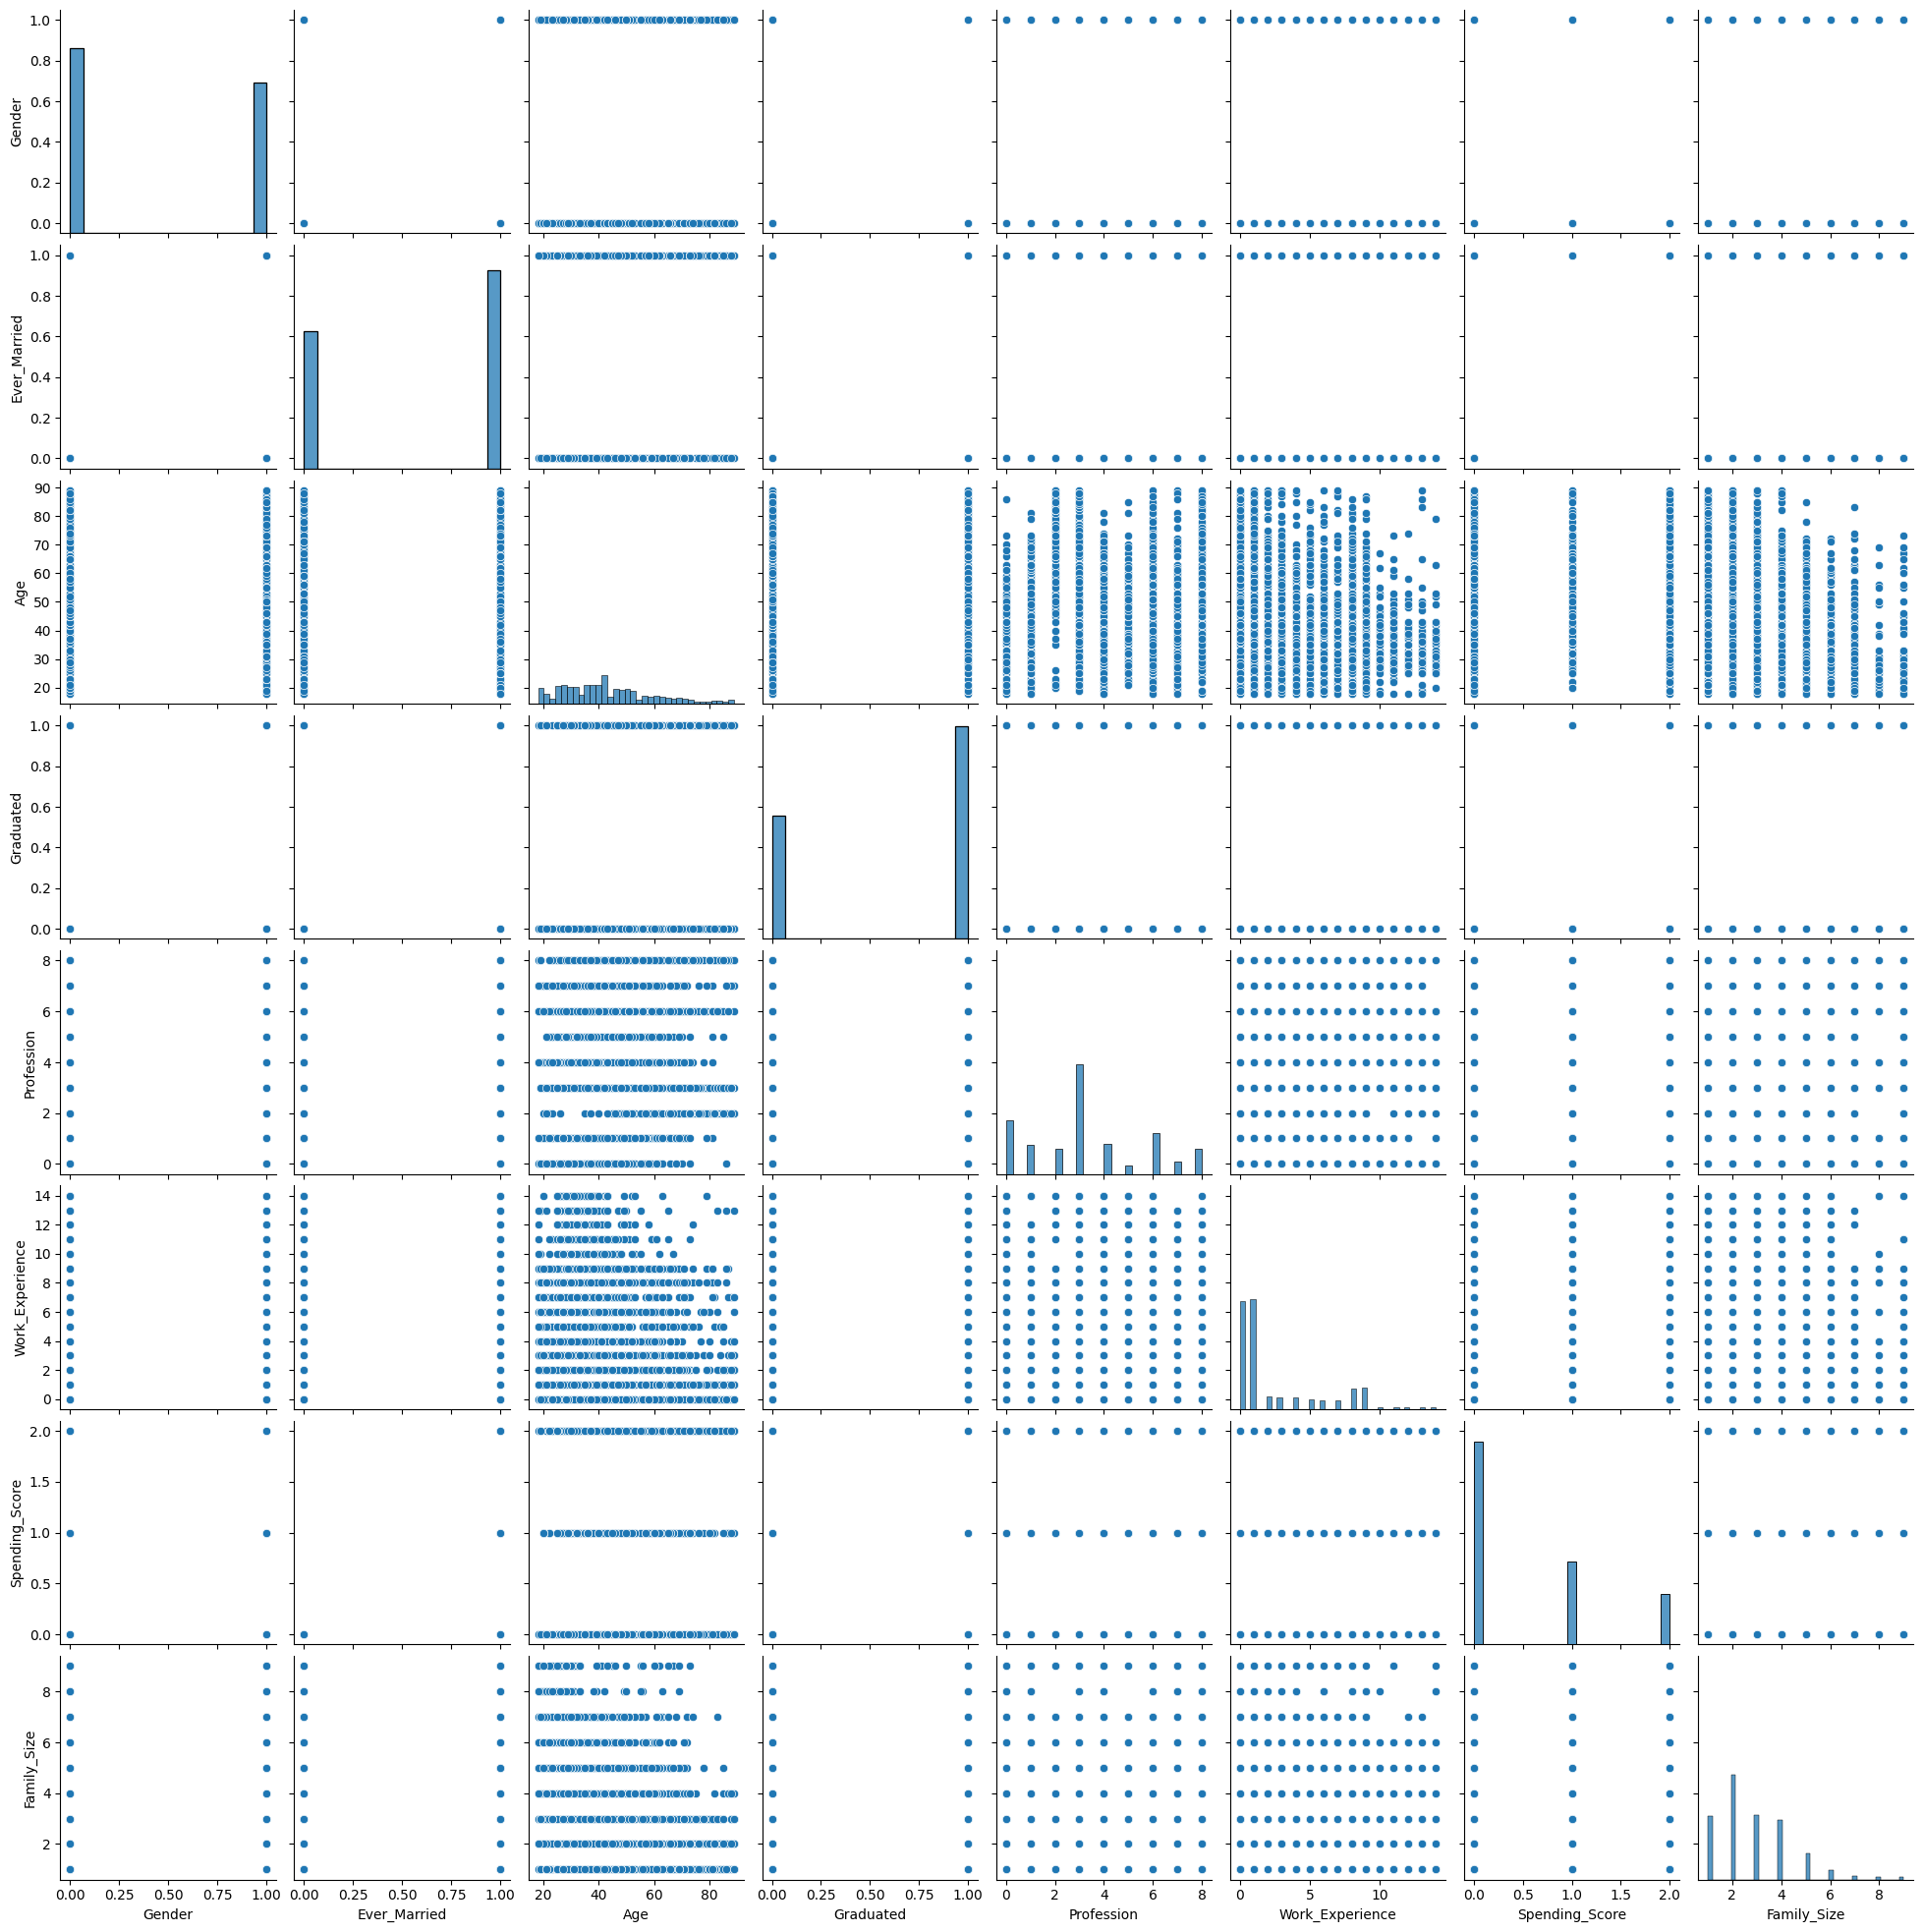

In [ ]:
sns.pairplot(customer_1)

<ipython-input-43-52129457dc14>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_1['Age'])


<Axes: xlabel='Age', ylabel='Density'>

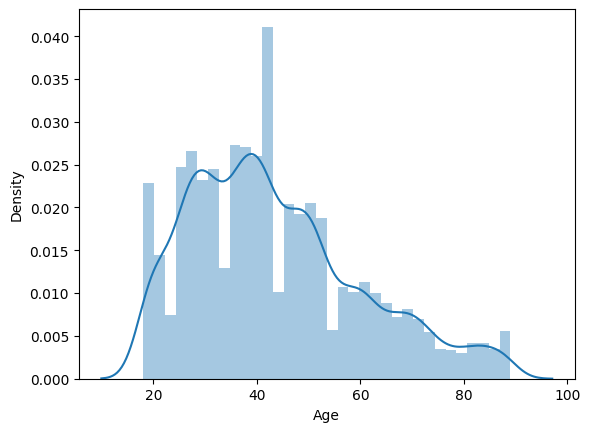

In [ ]:
sns.distplot(customer_1['Age'])

<Axes: xlabel='Family_Size', ylabel='Age'>

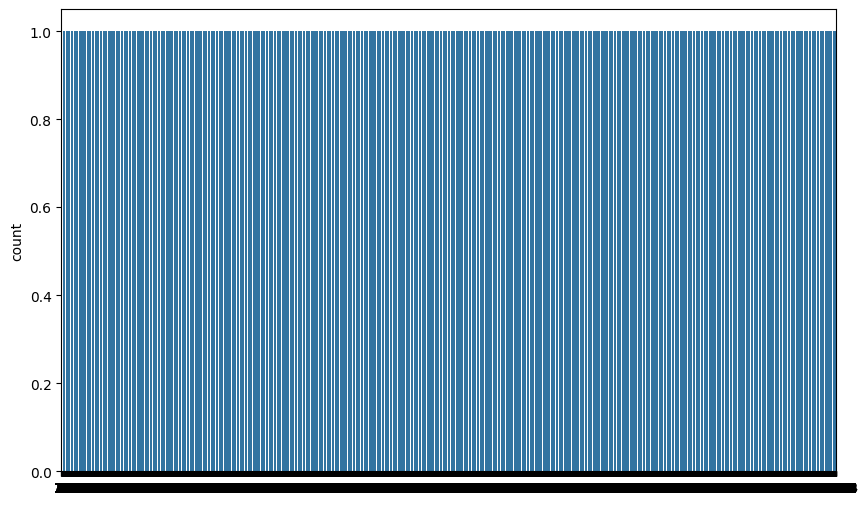

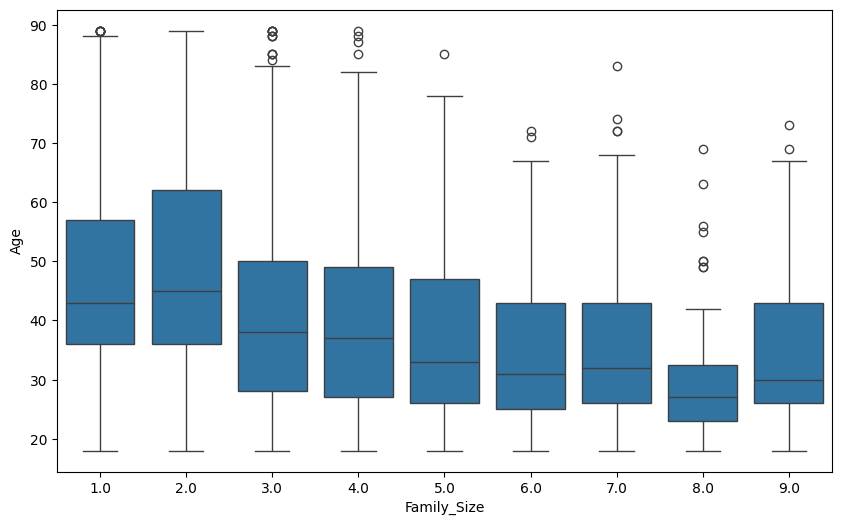

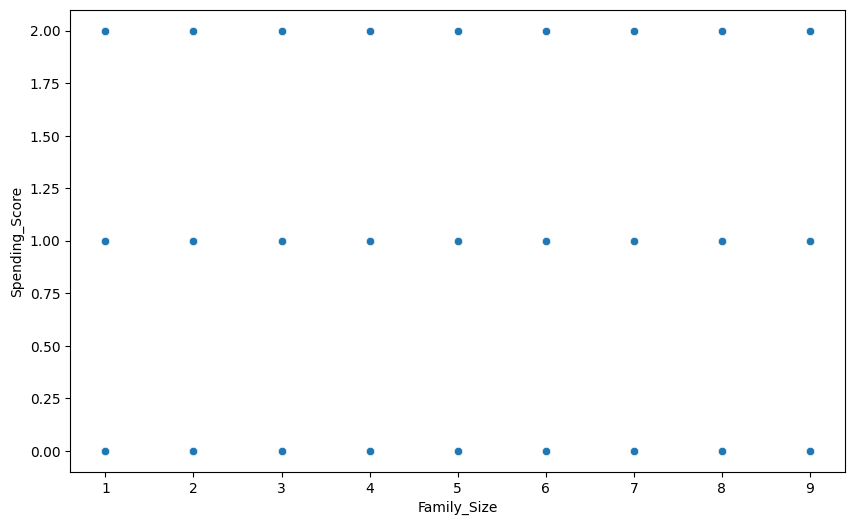

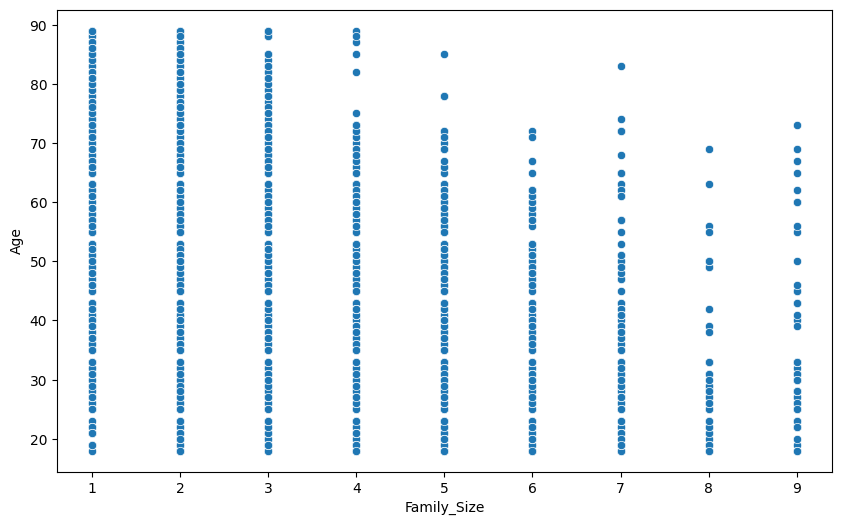

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(customer_1['Family_Size'])


plt.figure(figsize=(10,6))
sns.boxplot(x='Family_Size',y='Age',data=customer_1)


plt.figure(figsize=(10,6))
sns.scatterplot(x='Family_Size',y='Spending_Score',data=customer_1)


plt.figure(figsize=(10,6))
sns.scatterplot(x='Family_Size',y='Age',data=customer_1)

In [ ]:
customer_1.describe()


customer_1['Segmentation'].unique()


X=customer_1[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']].values


y1 = customer_1[['Segmentation']].values

In [ ]:
one_hot_enc = OneHotEncoder()


one_hot_enc.fit(y1)


y1.shape


y = one_hot_enc.transform(y1).toarray()


y.shape

(8819, 4)

In [ ]:
y1[0]

y[0]

X.shape

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=50)

X_train[0]

X_train.shape

(5908, 8)

In [ ]:
scaler_age = MinMaxScaler()

scaler_age.fit(X_train[:,2].reshape(-1,1))

MinMaxScaler()

In [ ]:
X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)

# To scale the Age column
X_train_scaled[:,2] = scaler_age.transform(X_train[:,2].reshape(-1,1)).reshape(-1)
X_test_scaled[:,2] = scaler_age.transform(X_test[:,2].reshape(-1,1)).reshape(-1)

Name: PRAVEEN D

Register Number: 212222240076

In [ ]:
from sklearn.utils.extmath import softmax
from tensorflow import keras
ai_brain = keras.Sequential([
    Dense(6,input_shape = (8,) ),
    Dense(64,activation="relu"),
    Dropout(rate=0.3),
    Dense(128,activation="relu"),
    Dropout(rate=0.3),
    #BatchNormalization(),
    Dense(32,activation="relu"),
    Dense(4,activation='softmax')
])

In [ ]:
ai_brain.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=250)

ai_brain.fit(x=X_train_scaled,y=y_train,epochs=250,batch_size=256,validation_data=(X_test_scaled,y_test),callbacks=early_stop)

Epoch 1/250
24/24 [==============================] - 3s 28ms/step - loss: 1.4030 - accuracy: 0.2901 - val_loss: 1.3589 - val_accuracy: 0.3425
Epoch 2/250
24/24 [==============================] - 0s 12ms/step - loss: 1.3534 - accuracy: 0.3387 - val_loss: 1.3230 - val_accuracy: 0.3700
Epoch 3/250
24/24 [==============================] - 0s 10ms/step - loss: 1.3253 - accuracy: 0.3614 - val_loss: 1.3018 - val_accuracy: 0.3851
Epoch 4/250
24/24 [==============================] - 0s 8ms/step - loss: 1.3010 - accuracy: 0.3827 - val_loss: 1.2911 - val_accuracy: 0.3896
Epoch 5/250
24/24 [==============================] - 0s 7ms/step - loss: 1.2965 - accuracy: 0.3890 - val_loss: 1.2853 - val_accuracy: 0.3975
Epoch 6/250
24/24 [==============================] - 0s 6ms/step - loss: 1.2866 - accuracy: 0.3998 - val_loss: 1.2792 - val_accuracy: 0.4126
Epoch 7/250
24/24 [==============================] - 0s 6ms/step - loss: 1.2753 - accuracy: 0.4025 - val_loss: 1.2738 - val_accuracy: 0.4150
Epoch 8/25

In [ ]:
metrics = pd.DataFrame(ai_brain.history.history)

metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.403026,0.290115,1.358880,0.342494
1,1.353353,0.338693,1.322959,0.369976
2,1.325349,0.361374,1.301826,0.385091
3,1.301031,0.382701,1.291138,0.389557
4,1.296535,0.388964,1.285252,0.397458


<Axes: >

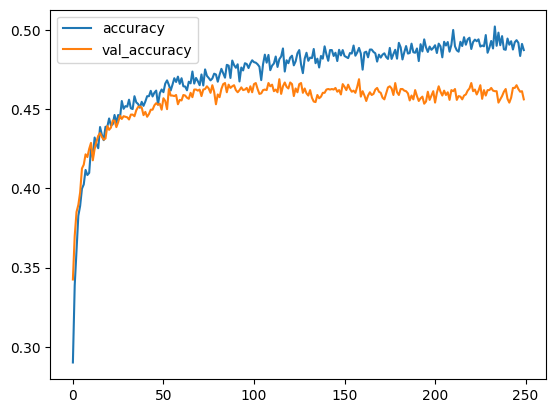

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(ai_brain.predict(X_test_scaled), axis=1)

x_test_predictions.shape

91/91 [==============================] - 0s 1ms/step


(2911,)

In [ ]:
y_test_truevalue = np.argmax(y_test,axis=1)

y_test_truevalue.shape

(2911,)

In [ ]:
print(confusion_matrix(y_test_truevalue,x_test_predictions))

print(classification_report(y_test_truevalue,x_test_predictions))

[[339 145  93 180]
 [217 166 197 106]
 [105 140 348  93]
 [198  63  46 475]]


In [ ]:
x_single_prediction = np.argmax(ai_brain.predict(X_test_scaled[1:2,:]), axis=1)

1/1 [==============================] - 0s 93ms/step


In [ ]:
print(x_single_prediction)

print(le.inverse_transform(x_single_prediction))

[2]
[2]
